# Assignmet 1 다항식 구현
다항식  \\(p(x) = {c}{0} + {c}{1}{x} + {c}{2}{x}^{2}\\)
이때 x와 y의 값은 아래와 같다.
 * (-1,1), (0,-1), (2,7)

x 벡터 (-1,0,2),  y 벡터(1,-1,7)을 입력 받아 
c0, c1, c2의 값을 구하는 함수 quad_interp 구현하시오
<br/>
<br/>
TIP <br/>
 - 1 = c0 + -1*c1 + 1*c2
 - -1 = c0 + 0*c1 + 0*c2
 - 7 = c0 + 2*c1 + 4*c2

In [10]:
import numpy as np

xi = np.array([-1.,  0.,  2.])
yi = np.array([ 1., -1.,  7.])

yi_T = (yi[:, np.newaxis])
x_T = [[1,-1,1],[1,0,0],[1,2,4]]
x_T_inv = np.linalg.inv(x_T)
np.matmul(x_T_inv, yi_T)
# c = quad_interp(xi,yi)

array([[ -1.00000000e+00],
       [ -1.11022302e-16],
       [  2.00000000e+00]])

## Assignment 2 Softmax cross entropy 구현

 softmax function은 exponential 을 이용해 normalized 하는 함수로
 k 차원 벡터 z의 softmax function은 아래와 같다.
 ![title1](./softmax.png)
 
 또한 predict 확률을 q(x) 정답 확률을 p(x) 라고 할때 cross entropy 함수는 아래와 같다.
 ![title2](./crossentropy.png)
 
  위 두가지 공식을 이용하여 아래 딥러닝 preidct 값을 softmax로 normalize 후 cross entropy 함수를 numpy로 구현하여 loss 값을 구하시오. <br /> 또한 구현한 numpy cross entropy 값을 tf.nn.softmax_cross_entropy_with_logits함수 결과값과 비교하시오
 * predict = [1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0]
 * label = [0, 0, 0, 1, 0, 0, 0]



In [30]:
import tensorflow as tf
import numpy as np

a = np.array([1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0],dtype='f8')
sess = tf.Session()
softmax = tf.nn.softmax(a)
predict = sess.run(softmax)

label = np.array([0, 0, 0, 1.0, 0, 0, 0])

num_ = -np.sum(np.matmul(label,np.log(predict)))

ten_ = tf.nn.softmax_cross_entropy_with_logits(logits=a, labels=label)

print(num_, sess.run(ten_))

0.744792116252 0.744792116252


## Assignment 3 Game of life 구현

 John Conway가 고안한 세포 자동생성자 게임.
 초기 값을 세팅하고 세포가 진화하는 과정을 관찰하는 게임.
 
 위키링크: https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life <br\>
 
 game of life는 2차원 세계로 이루 어져 있으며, 각각의 세포는 live 또는 dead의 상태를 갖는다. <br\>
 또한 세포의 상태는 8방향의 이웃 세포에 의해 결정되며 규칙은 아래와 같다.
 * Live cell 주변에 Live cell이 2개 또는 3개 있으면 다음 세대에서도 생존한다. (live state)
 * 이외의 모든 조건에서는 죽는다. (dead state)
 * Dead cell 주변에 Live cell이 3개 있으면 다음 세대에서 부활한다. (live state)
 * 이외의 모든 조건에서는 죽는다. (dead state)
<br/>
<br/>
 TIP <br/>
- 이미지에 padding을 한후 numpy slicing을 이용하면 전체 이미지 8방향에 대해 이웃을 count 할수 있다.

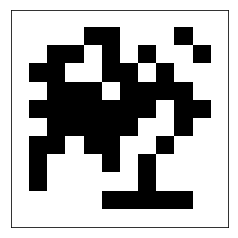

NameError: name 'res_Z' is not defined

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def iterate(Z):
    # Count neighbours

    # Apply rules

    return res_Z

#Z = np.random.randint(0,2,(10,10))

Z = np.array([[0,0,0,1,1,0,0,0,1,0],
                 [0,1,1,0,1,0,1,0,0,1],
                 [1,1,0,0,1,1,0,1,0,0],
                 [0,1,1,1,0,1,1,1,1,0],
                 [1,1,1,1,1,1,1,0,1,1],
                 [0,1,1,1,1,1,0,0,1,0],
                 [1,1,0,1,1,0,0,1,0,0],
                 [1,0,0,0,1,0,1,0,0,0],
                 [1,0,0,0,0,0,1,0,0,0],
                 [0,0,0,0,1,1,1,1,1,0]])

#for padding boundary
Z = np.lib.pad(Z, ((1,1),(1,1)),  'constant',  constant_values=((0,0), (0,0)))
fig = plt.figure()

for i in range(20):
    plt.imshow(Z,interpolation='nearest', cmap=plt.cm.gray_r)
    plt.xticks([]), plt.yticks([])
    plt.show()
    Z = iterate(Z)


 ![title_res0](./0.png)

 ![title_res1](./1.png)

 ![title_res2](./2.png)

In [32]:
import numpy as np
import matplotlib.pyplot as plt

Z = np.array([[0,0,0,1,1,0,0,0,1,0],
                 [0,1,1,0,1,0,1,0,0,1],
                 [1,1,0,0,1,1,0,1,0,0],
                 [0,1,1,1,0,1,1,1,1,0],
                 [1,1,1,1,1,1,1,0,1,1],
                 [0,1,1,1,1,1,0,0,1,0],
                 [1,1,0,1,1,0,0,1,0,0],
                 [1,0,0,0,1,0,1,0,0,0],
                 [1,0,0,0,0,0,1,0,0,0],
                 [0,0,0,0,1,1,1,1,1,0]])

Z = np.lib.pad(Z, ((1,1),(1,1)),  'constant',  constant_values=((0,0), (0,0)))

                                    
Z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0],
       [0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0],
       [0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0],
       [0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0],
       [0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])